In [2]:
#Import dependencies
import pandas as pd
import requests

In [31]:
#Retrieve the data
crypto_data = pd.read_csv("Resources/crypto_data.csv")
crypto_data = crypto_data.drop("CoinName", axis=1)
crypto_data = crypto_data.drop("Unnamed: 0", axis=1)
crypto_data

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,X11,True,PoW/PoS,NaN,2300000000
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SHA-256,True,PoW,NaN,611000
4,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1247,Scrypt,True,PoS,1.283270e+05,1000000
1248,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Scrypt,False,PoW/PoS,NaN,233100000
1250,SHA-256,False,PoW/PoS,NaN,21000000


In [32]:
#Discard all cryptocurrencies that are not being traded
active_traders = crypto_data[crypto_data.IsTrading==True]
active_traders

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,X11,True,PoW/PoS,NaN,2300000000
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SHA-256,True,PoW,NaN,611000
4,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Ethash,True,PoW,NaN,1000000000
1244,SHA-256,True,DPoI,NaN,1000000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [33]:
#Drop the feature
drop_feature = active_traders.drop("IsTrading", axis=1)
drop_feature

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [34]:
#Remove all rows that have at least one null value
no_nulls = drop_feature.dropna()
no_nulls

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [35]:
#Filter for cryptocurrencies that have been mined.
mined_coins = no_nulls[no_nulls.TotalCoinsMined>0]
mined_coins

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [36]:
#Convert categorical values to numerical values
categorical_features = mined_coins.dtypes[mined_coins.dtypes==object]
categorical_features

Algorithm          object
ProofType          object
TotalCoinSupply    object
dtype: object

In [38]:
encoded_features = pd.get_dummies(data=mined_coins, columns=["Algorithm", "ProofType"])
encoded_features.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [46]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(encoded_features)
print(features_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [44]:
#Perform dimensionality reduction with PCA while preserving 90% of the explained variance.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
features_pca = pca.fit_transform(features_scaled)

In [98]:
pca_df = pd.DataFrame(features_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.072303e-16,-7.956437e-15,7.872893e-15,2.924671e-15,-3.892443e-16,8.633923e-16,3.052522e-15,4.896091e-15,-4.883682e-15,6.980473e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.557869e-16,-7.815760e-15,7.776851e-15,3.078532e-15,-2.803243e-16,7.583107e-16,3.023820e-15,5.025730e-15,-4.689595e-15,1.064663e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.585031e-13,7.673845e-14,-2.595322e-13,2.392680e-14,-6.133749e-14,5.696326e-15,-6.166034e-14,7.925024e-14,1.796626e-14,-2.821501e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835193e-15,-8.578812e-12,2.236011e-14,-0.002071,0.281463,0.251862,...,1.876415e-14,4.910524e-15,-4.078747e-14,3.040192e-15,9.186224e-15,3.091744e-15,-7.759718e-15,1.574858e-14,1.363431e-14,-1.999486e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.135403e-15,-1.191114e-11,4.760759e-14,0.027735,0.519099,0.188820,...,-1.681262e-14,-2.808937e-15,1.897747e-13,-8.792341e-14,2.102746e-13,1.220217e-13,-1.844720e-14,7.230983e-14,1.693282e-13,-2.162062e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.664806e-14,-5.749387e-11,-4.025011e-14,-0.851713,2.041159,3.560713,...,1.445641e-14,-1.406340e-16,-4.242676e-14,2.445711e-15,1.296190e-14,-2.404153e-15,-8.550551e-15,1.776400e-14,1.514219e-14,-2.700414e-14
528,-0.333144,1.032071,-0.590740,0.001399,4.223369e-15,9.768210e-12,-6.244300e-14,-0.007154,-1.320125,-0.052460,...,8.195929e-16,-7.909121e-15,7.840867e-15,2.913481e-15,-5.260337e-16,6.535091e-16,3.062419e-15,5.004146e-15,-4.741964e-15,2.438518e-16
529,0.324349,-2.312308,0.421515,-0.001319,-4.420488e-15,-9.204796e-12,4.382577e-14,0.017309,0.161077,-0.047787,...,-9.239846e-15,-3.308421e-14,2.096125e-14,-2.273023e-14,8.705955e-14,-7.316181e-15,1.739290e-14,-2.090935e-16,3.890745e-14,-1.371467e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-4.243369e-15,-1.218340e-11,4.722599e-14,0.028954,0.544389,0.233373,...,2.114391e-15,-1.316735e-15,-6.747534e-15,-4.158631e-15,1.235668e-15,2.648919e-15,1.290511e-15,1.624219e-15,-3.224282e-15,4.842510e-15


In [47]:
#Explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [99]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200)
features_tsne = tsne.fit_transform(pca_df)
features_tsne

array([[-16.952612 ,   4.907529 ],
       [-20.0934   ,  12.289206 ],
       [-29.561916 ,   4.467631 ],
       ...,
       [ 25.016382 ,   3.1080291],
       [ 21.941832 ,  -6.9233136],
       [ -2.8171551,  -8.603198 ]], dtype=float32)

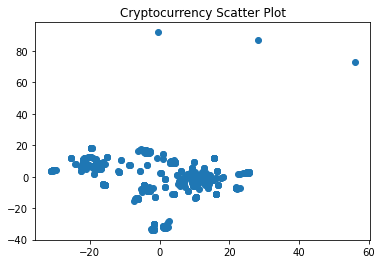

In [108]:
#Create a scatter plot of the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(features_tsne[:,0], features_tsne[:,1])
plt.title("Cryptocurrency Scatter Plot")
plt.show()

In [85]:
#Using K-means create a for-loop to determine the inertia for each k between 1 through 10
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))
for i in k:
    cluster_means = KMeans(n_clusters=i, random_state=10)
    cluster_means.fit(features_tsne)
    inertia.append(cluster_means.inertia_)

C:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


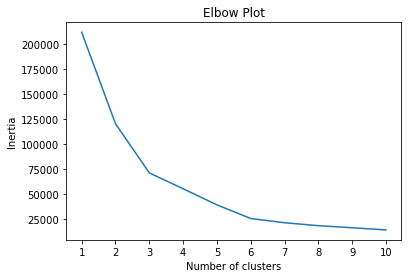

In [107]:
#Create an elbow plot to identify the best number of clusters
curve_dic = {"k": k, "inertia": inertia}
curve_df = pd.DataFrame(curve_dic)
plt.plot(curve_df["k"], curve_df["inertia"])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot")
plt.show()

In [88]:
#Based on the elbow of the plot we determine if the currencies can fit into 3 clusters
clusters_model = KMeans(n_clusters=3, random_state=10)
clusters_model.fit(features_tsne)

KMeans(n_clusters=3, random_state=10)

In [96]:
clusters_model.predict(features_tsne)

array([2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,

In [101]:
clusters_df = pd.DataFrame(features_tsne)
clusters_df["class"] = clusters_model.labels_
clusters_df.head()

,0,1,class
0,-16.952612,4.907529,2
1,-20.093399,12.289206,2
2,-29.561916,4.467631,2
3,2.037798,-32.269943,1
4,16.128824,-11.028308,0


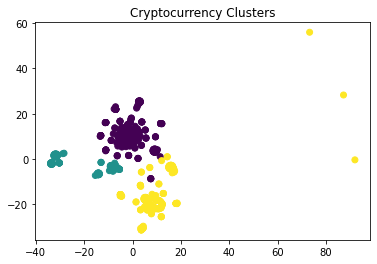

In [106]:
#Visualize the clusters
plt.scatter(clusters_df[1], clusters_df[0], c=clusters_df["class"])
plt.title("Cryptocurrency Clusters")
plt.show()